In [1]:
import numpy as np
import pandas as pd

file_path = r"C:\Users\paulb\Downloads\processed-global\global\global.tsv"
keep = ['mutations', 'total_score', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd', 'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'filter_total_score', 'buried_all', 'contact_all', 'degree', 'res_count_all',  'total_hydrophobic', 'total_sasa', 'centroid_total_score', 'pair', 'rg', 'rsigma', 'sheet', 'ss_pair', 'vdw']
chunks = []
for chunk in pd.read_csv(file_path, sep='\t', chunksize=100000, usecols=keep):
    # optional preprocessing here
    chunks.append(chunk)

df = pd.concat(chunks, ignore_index=True)
df.head()

,mutations,total_score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_rep,fa_sol,hbond_bb_sc,...,res_count_all,total_hydrophobic,total_sasa,centroid_total_score,pair,rg,rsigma,sheet,ss_pair,vdw
0,"I147H,E184Y,D197M",-661.562,0.000,-1277.306,281.626,-427.495,2.297,139.922,804.764,-53.709,...,207.0,29632.0,9380.603,-75.406,-42.563,50.223,-44.047,11.670,-50.127,0.269
1,"S35T,I99R",-460.501,0.000,-962.288,199.977,-304.407,1.669,100.334,624.059,-14.939,...,151.0,22319.0,7575.692,-19.500,-26.542,45.738,0.000,0.000,0.000,0.000
2,"G88A,A175Y",-558.100,-2.042,-1147.800,219.105,-368.393,1.901,120.335,773.354,-50.056,...,185.0,25596.0,8592.479,16.417,-40.491,45.760,0.000,7.551,0.000,0.435
3,"L11Q,I62E,Q94G",-296.940,0.000,-532.605,104.883,-171.326,1.006,55.332,318.972,-21.179,...,98.0,13951.0,6015.849,-18.804,-17.832,40.262,-20.618,11.670,-23.427,0.000
4,"L11A,E14V,L110E,Q140M",-471.901,0.000,-988.380,206.459,-263.972,1.728,113.627,537.689,-39.222,...,166.0,23996.0,8200.198,-15.158,6.061,45.763,-42.011,7.894,-51.185,0.758


In [2]:
print(df.columns.tolist())
print(len(df))

['mutations', 'total_score', 'dslf_fa13', 'fa_atr', 'fa_dun', 'fa_elec', 'fa_intra_rep', 'fa_rep', 'fa_sol', 'hbond_bb_sc', 'hbond_lr_bb', 'hbond_sc', 'hbond_sr_bb', 'lk_ball_wtd', 'omega', 'p_aa_pp', 'pro_close', 'rama_prepro', 'ref', 'filter_total_score', 'buried_all', 'contact_all', 'degree', 'res_count_all', 'total_hydrophobic', 'total_sasa', 'centroid_total_score', 'pair', 'rg', 'rsigma', 'sheet', 'ss_pair', 'vdw']
29227460


In [3]:
train_path = r"C:\Users\paulb\Downloads\processed-global\global\splits\standard_tr0.9_tu0.05_te0.05_w2a93d88bac32_r2098\train.txt"
test_path = r"C:\Users\paulb\Downloads\processed-global\global\splits\standard_tr0.9_tu0.05_te0.05_w2a93d88bac32_r2098\test.txt"
val_path = r"C:\Users\paulb\Downloads\processed-global\global\splits\standard_tr0.9_tu0.05_te0.05_w2a93d88bac32_r2098\val.txt"

train_ids = pd.read_csv(train_path, header=None, sep='\t')[0]
test_ids  = pd.read_csv(test_path,  header=None, sep='\t')[0]
val_ids   = pd.read_csv(val_path,   header=None, sep='\t')[0]

train_df = df.loc[df.index.intersection(train_ids)]
test_df  = df.loc[df.index.intersection(test_ids)]
val_df   = df.loc[df.index.intersection(val_ids)]


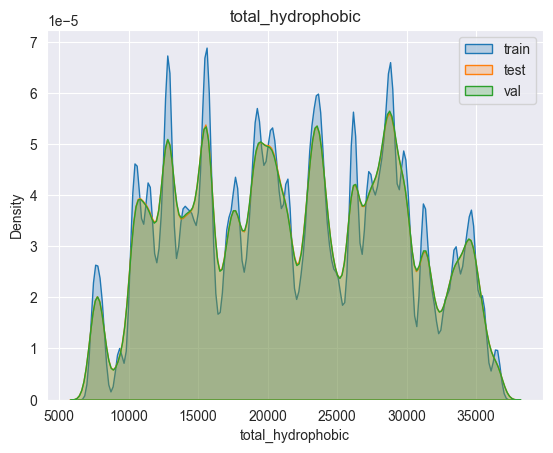

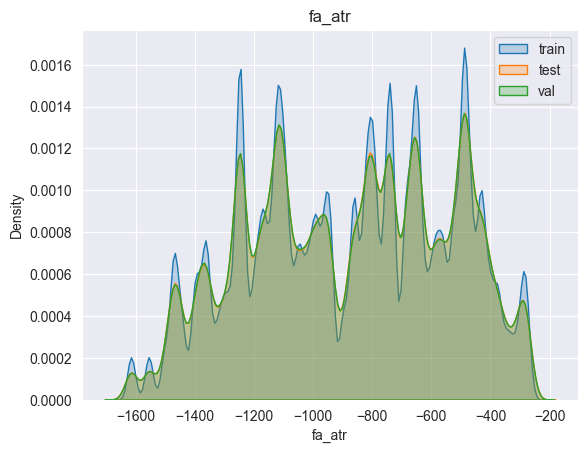

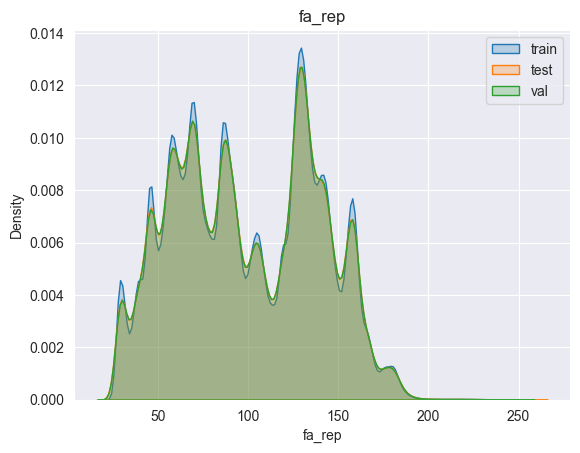

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['res_count_all' ]
for col in cols:
    sns.kdeplot(train_df[col], label='train', fill=True)
    sns.kdeplot(test_df[col], label='test', fill=True)
    sns.kdeplot(val_df[col], label='val', fill=True)
    plt.title(col)
    plt.legend()
    plt.show()

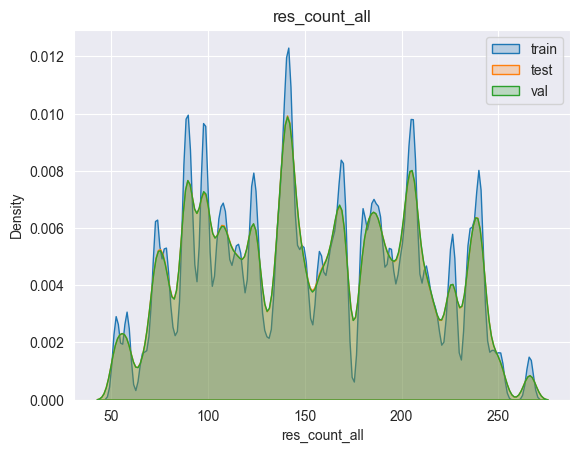

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['res_count_all']
for col in cols:
    sns.kdeplot(train_df[col], label='train', fill=True)
    sns.kdeplot(test_df[col], label='test', fill=True)
    sns.kdeplot(val_df[col], label='val', fill=True)
    plt.title(col)
    plt.legend()
    plt.show()

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

rosetta_numeric = [c for c in rosetta if c != 'pdb_fn']
df_rosetta = df[rosetta_numeric]

correlation = df_rosetta.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='bwr', center=0)
plt.title("Correlation of rosetta components")
plt.show()

NameError: name 'rosetta' is not defined

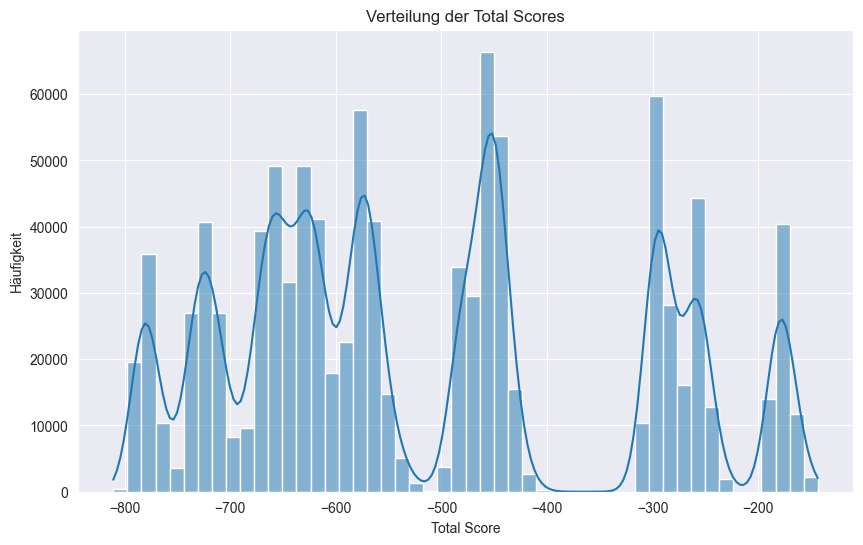

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['total_score'], bins=50, kde=True)
plt.xlabel("Total Score")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Total Scores")
plt.show()

In [20]:
chunks = []
for chunk in pd.read_csv(file_path, sep='\t', usecols=['pdb_fn','total_score'], chunksize=100000):
    chunk['pdb_prefix'] = chunk['pdb_fn'].astype(str).str[:4]
    # sowohl pdb_prefix als auch total_score behalten
    chunks.append(chunk[['pdb_prefix', 'total_score']])

df_prefix_scores = pd.concat(chunks, ignore_index=True)
print(df_prefix_scores.head())


  pdb_prefix  total_score
0       1h2e     -661.562
1       1a6m     -460.501
2       1gbs     -558.100
3       1jo0     -296.940
4       1cjw     -471.901


In [17]:

unique_proteins = df['pdb_prefix'].nunique()
print("Anzahl unterschiedlicher Proteine:", unique_proteins)

unique_proteins = df['pdb_prefix'].unique()
print(unique_proteins)

# Zeilenanzahl pro Protein
counts = df_prefix_scores['pdb_prefix'].value_counts()
print(counts)


Anzahl unterschiedlicher Proteine: 58
['1h2e' '1a6m' '1gbs' '1jo0' '1cjw' '1g9o' '1aoe' '1jo8' '1jfx' '1i5g'
 '1fvg' '1mk0' '1iwd' '1gzc' '1ql0' '1ny1' '1beh' '1htw' '1i58' '1aba'
 '1bdo' '1czn' '1t8k' '1h0p' '1ag6' '1a70' '1jwq' '1ku3' '1nb9' '1nrv'
 '1fqt' '1jl1' '1m8a' '1nps' '1i71' '1brf' '1k7c' '1tqg' '1d1q' '1dlw'
 '1eaz' '1cke' '1kid' '1cc8' '1c9o' '1lpy' '1dsx' '1whi' '1pch' '1c44'
 '1ej0' '1qf9' '2hs1' '1beb' '1ktg' '1c52' '1ej8' '2mhr']
pdb_prefix
1k6k    199366
1tzv    199340
1kq6    199283
1tqg    199159
1m8a    199086
         ...  
5ptp    195296
1kqr    195207
1brf    194700
1pko    173698
1rw7    171441
Name: count, Length: 148, dtype: int64


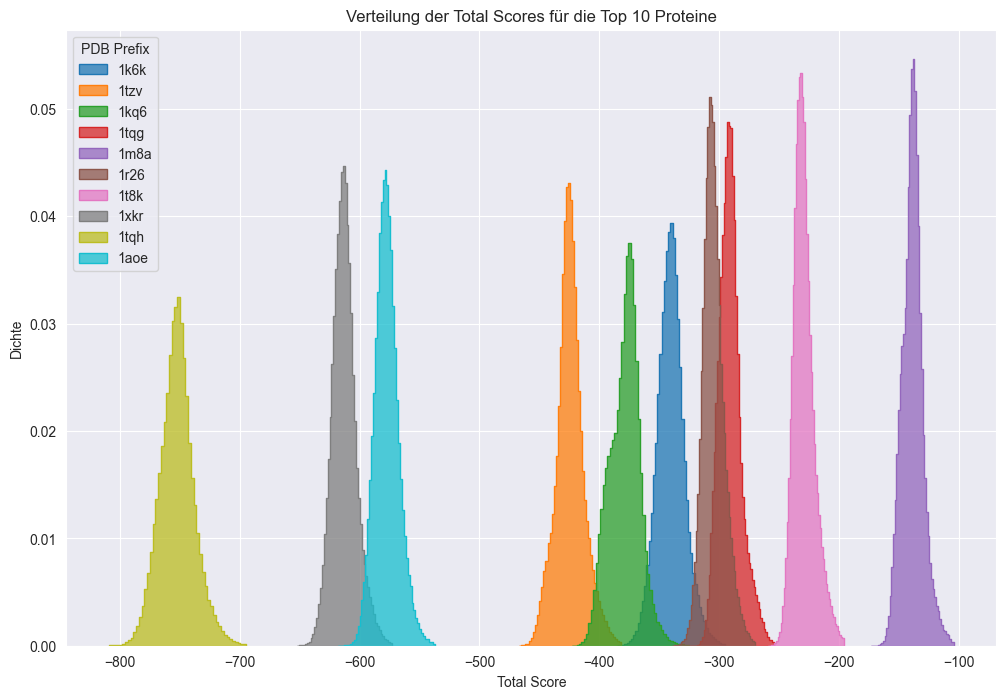

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

counts = df_prefix_scores['pdb_prefix'].value_counts()

top10_ids = counts.head(10).index.tolist()

top10_df = df_prefix_scores[df_prefix_scores['pdb_prefix'].isin(top10_ids)]

palette = sns.color_palette("tab10", n_colors=len(top10_ids))

plt.figure(figsize=(12,8))
for i, pdb in enumerate(top10_ids):
    subset = top10_df[top10_df['pdb_prefix'] == pdb]
    sns.histplot(subset['total_score'], element='step', stat='density', common_norm=False, bins=50, color=palette[i], label=pdb)

plt.xlabel("Total Score")
plt.ylabel("Dichte")
plt.title("Verteilung der Total Scores für die Top 10 Proteine")
plt.legend(title='PDB Prefix')
plt.show()


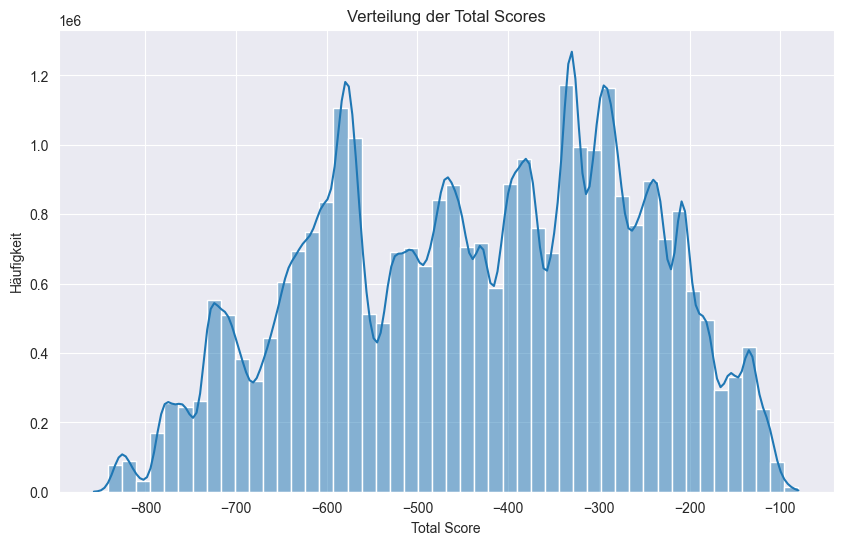

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df_prefix_scores['total_score'], bins=50, kde=True)
plt.xlabel("Total Score")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Total Scores")
plt.show()